<a href="https://colab.research.google.com/github/karankumarr17/IRIS_flower_classification/blob/main/Copy_of_IRIS_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Loaded Successfully!

Dataset Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    flo

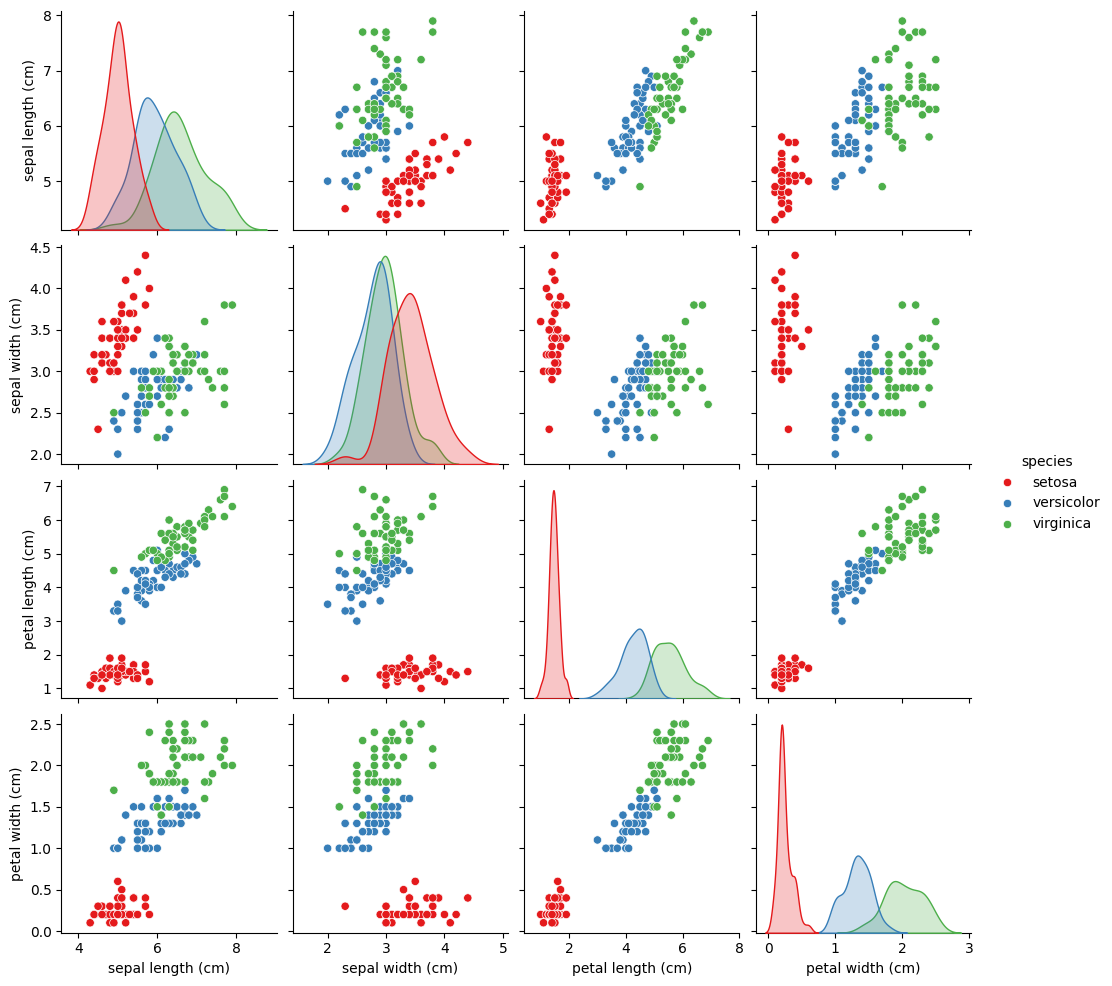


Model Trained Successfully!

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.00


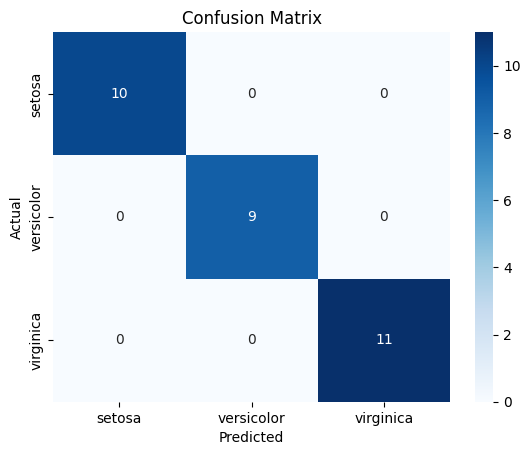

Model saved as iris_classifier.pkl


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Step 1: Load the dataset
def load_data():
    iris = load_iris()
    data = pd.DataFrame(iris.data, columns=iris.feature_names)
    data['species'] = iris.target
    target_mapping = {0: "setosa", 1: "versicolor", 2: "virginica"}
    data['species'] = data['species'].map(target_mapping)
    print("Dataset Loaded Successfully!")
    return data

data = load_data()

# Step 2: Data Exploration
def explore_data(data):
    print("\nDataset Overview:")
    print(data.head())
    print("\nDataset Summary:")
    print(data.info())
    print("\nDataset Statistics:")
    print(data.describe())

    print("\nVisualizing pairplot:")
    sns.pairplot(data, hue='species', palette='Set1')
    plt.show()

explore_data(data)

# Step 3: Preprocessing
def preprocess_data(data):
    # Split data into features (X) and target (y)
    X = data.drop(columns=['species'])
    y = data['species']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess_data(data)

# Step 4: Model Selection and Training
def train_model(X_train, y_train):
    model = RandomForestClassifier(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)
    print("\nModel Trained Successfully!")
    return model

model = train_model(X_train, y_train)

# Step 5: Model Evaluation
def evaluate_model(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return accuracy

accuracy = evaluate_model(model, X_test, y_test)

# Step 6: Save the Model
def save_model(model, file_name="iris_classifier.pkl"):
    import joblib
    joblib.dump(model, file_name)
    print(f"Model saved as {file_name}")

save_model(model)
